In [1]:
#from astropy.io import fits
import pandas as pd
from astropy.table import Table
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np

from numcosmo_py import Ncm, Nc
from numcosmo_py.external.pyssc import pyssc as PySSC

Ncm.cfg_init()

In [2]:
catalog_detections = Table.read('JPAS_mock_cut_map_detections_refined_amico.fits', format='fits')
catalog_detections_df = catalog_detections.to_pandas()
catalog_detections_df.columns
display(catalog_detections_df.sort_values('ID'))

,ID,Xpix,Ypix,Zpix,Xphys,Yphys,Zphys,SN,SN_NO_CLUSTER,AMP,...,Pz-170,Pz-171,Pz-172,Pz-173,Pz-174,Pz-175,Pz-176,Pz-177,Pz-178,Pz-179
0,1,515,473,62,168.44613,42.156442,0.3175,5.867690,87.033669,4.090747,...,5.967026e-08,5.070822e-08,4.300891e-08,3.640778e-08,3.075972e-08,2.593703e-08,2.182759e-08,1.833315e-08,1.536782e-08,1.285672e-08
1,2,182,1470,48,165.86241,47.080545,0.2475,5.892297,86.659293,3.730575,...,2.427310e-09,2.032764e-09,1.702618e-09,1.426454e-09,1.195497e-09,1.002364e-09,8.408538e-10,7.057659e-10,5.927440e-10,4.981441e-10
2,3,558,1909,39,168.56410,49.339187,0.2025,4.906849,81.164196,2.788196,...,1.913213e-09,1.603504e-09,1.342268e-09,1.122124e-09,9.367961e-10,7.809512e-10,6.500553e-10,5.402549e-10,4.482760e-10,3.713372e-10
3,4,656,1629,39,169.33168,47.945651,0.2025,4.851333,79.344641,2.725689,...,1.908387e-09,1.600507e-09,1.340369e-09,1.120873e-09,9.359281e-10,7.803198e-10,6.495862e-10,5.399147e-10,4.480518e-10,3.712247e-10
4,5,241,243,101,166.66567,40.965584,0.5125,4.693950,77.188121,4.876902,...,1.156341e-05,1.014819e-05,8.891312e-06,7.776572e-06,6.789351e-06,5.916443e-06,5.145913e-06,4.466962e-06,3.869822e-06,3.345657e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59095,59096,582,1978,7,168.73945,49.686135,0.0425,1.462732,6.000376,0.184540,...,1.541409e-11,1.285800e-11,1.071906e-11,8.929230e-12,7.431786e-12,6.179367e-12,5.132374e-12,4.257653e-12,3.527416e-12,2.918343e-12
59096,59097,116,1257,64,165.46633,45.999425,0.3275,1.516731,6.000284,0.290587,...,3.351673e-07,2.911887e-07,2.524701e-07,2.184508e-07,1.886219e-07,1.625224e-07,1.397350e-07,1.198830e-07,1.026267e-07,8.766071e-08
59097,59098,351,375,89,167.36342,41.645396,0.4525,1.314309,6.000214,0.330901,...,9.315864e-06,8.141893e-06,7.103203e-06,6.185885e-06,5.377255e-06,4.665769e-06,4.040944e-06,3.493275e-06,3.014163e-06,2.595846e-06
59098,59099,814,1948,41,170.52501,49.541393,0.2125,1.443904,6.000172,0.234516,...,3.505981e-09,2.859392e-09,2.326947e-09,1.889583e-09,1.531195e-09,1.238227e-09,9.993005e-10,8.048952e-10,6.470722e-10,5.192301e-10


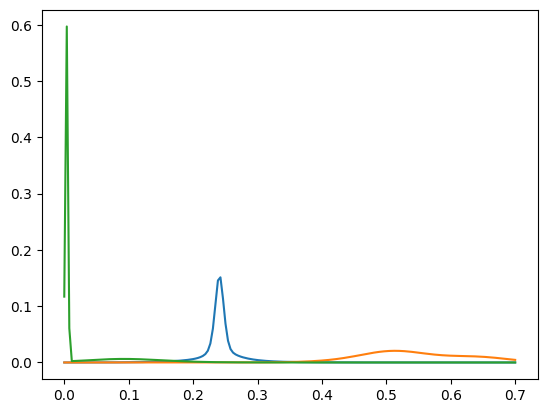

In [3]:
pz_0 = []
z = np.linspace(0,0.7 , 180)
for i in range(180):
    pz_0.append(catalog_detections_df['Pz-%i' %(i)].values[0])

plt.plot(z , pz_0)

pz_46607 = []
z = np.linspace(0,0.7 , 180)
for i in range(180):
    pz_46607.append(catalog_detections_df['Pz-%i' %(i)].values[46607])

plt.plot(z , pz_46607)


pz_55770 = []
z = np.linspace(0,0.7 , 180)
for i in range(180):
    pz_55770.append(catalog_detections_df['Pz-%i' %(i)].values[55770])

plt.plot(z , pz_55770)

plt.show()

In [4]:
area = 4109.3
cosmo = Nc.HICosmoDEXcdm()
cosmo.param_set_by_name("H0", 67.74)
cosmo.param_set_by_name("Omegab", 0.0486)
cosmo.param_set_by_name("Omegax", 0.6911)
cosmo.param_set_by_name("Omegac", 0.2603)
cosmo.param_set_by_name("w", -1.0)


prim = Nc.HIPrimPowerLaw.new()
prim.param_set_by_name("ln10e10ASA", 3.02745)
prim.param_set_by_name("n_SA", 0.9667)

reion = Nc.HIReionCamb.new()

cosmo.add_submodel(prim)
cosmo.add_submodel(reion)

dist = Nc.Distance.new(2.0)

tf = Nc.TransferFuncEH()

psml = Nc.PowspecMLTransfer.new(tf)
psml.require_kmin(1.0e-6)
psml.require_kmax(1.0e3)

psf = Ncm.PowspecFilter.new(psml, Ncm.PowspecFilterType.TOPHAT)
psf.set_best_lnr0()

mulf = Nc.MultiplicityFuncTinker.new()
mulf.set_mdef(Nc.MultiplicityFuncMassDef.CRITICAL)
mulf.set_Delta(200.0)

hmf = Nc.HaloMassFunction.new(dist, psf, mulf)
hmf.set_area(area * (np.pi / 180) ** 2)
hmf.prepare(cosmo)
hbias_Tinker = Nc.HaloBiasTinker.new(hmf)
cad = Nc.ClusterAbundance.new(hmf, None)
cad.set_area(area * (np.pi / 180) ** 2)
hmf.prepare(cosmo)

#σ_8 = 0.8159

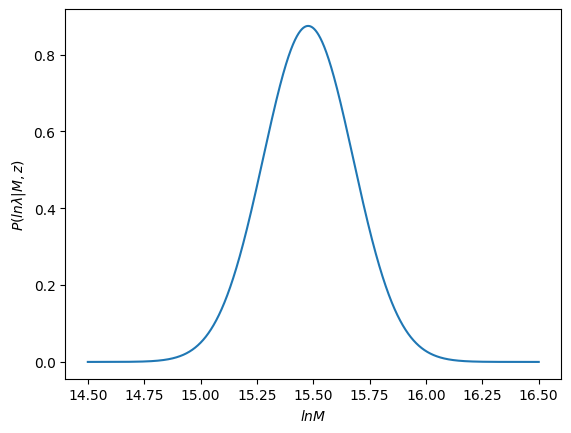

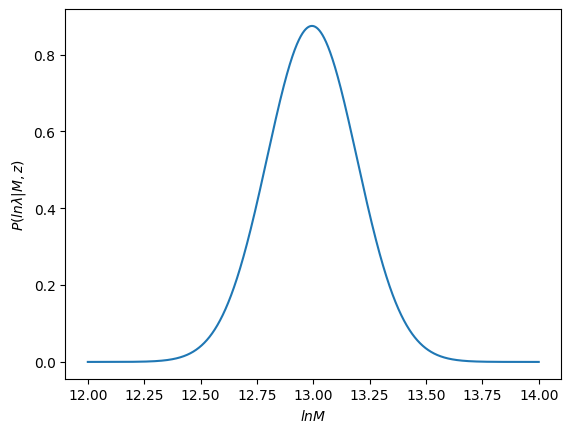

In [5]:
#mass proxy
cluster_m = Nc.ClusterMassAscaso(lnRichness_min = 0.0 ,lnRichness_max = 6.5)
cluster_m.param_set_by_name("mup0", 4.207)
cluster_m.param_set_by_name("mup1", 0.993)
cluster_m.param_set_by_name("mup2", 0)
cluster_m.param_set_by_name("sigmap0", 0.456)
cluster_m.param_set_by_name("sigmap1", 0.0)
cluster_m.param_set_by_name("sigmap2", 0.0)

cluster_m.set_property("mup0_fit", True)
cluster_m.set_property("mup1_fit", True)
cluster_m.set_property("sigmap0_fit", True)

#photo-z
cluster_z = Nc.ClusterRedshiftNodist (z_min = 0.0 , z_max = 0.7)

masses  = np.linspace(np.log(10) *14.5 , np.log(10) * 16.5,10000)
masses_10  = np.linspace(14.5 ,16.5,10000)
relation = []

for i in range(len(masses)):
    relation.append(cluster_m.p(cosmo , masses[i], 0.1 , [np.log(470.350090)] , None))
plt.plot(masses_10 , relation)
plt.ylabel(r'$P(ln\lambda|M,z)$')
plt.xlabel(r'$lnM$')
plt.show()


masses  = np.linspace(np.log(10) *12 , np.log(10) * 14.0,10000)
masses_10  = np.linspace(12.0 ,14.0,10000)
relation = []

for i in range(len(masses)):
    relation.append(cluster_m.p(cosmo , masses[i], 0.1 , [np.log(1.610150)] , None))
plt.plot(masses_10 , relation)
plt.ylabel(r'$P(ln\lambda|M,z)$')
plt.xlabel(r'$lnM$')
plt.show()

1051087.9390738695
116836.12225479489
1050990.4158965815


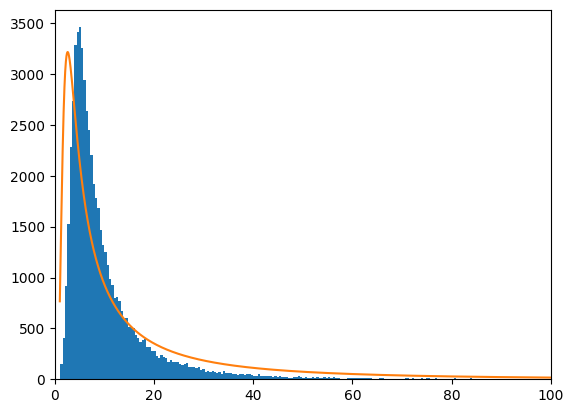

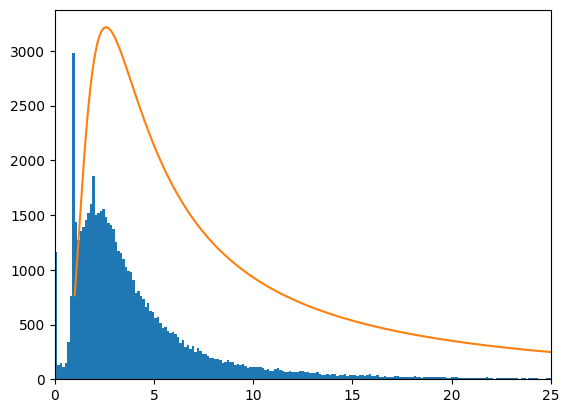

In [6]:
cad.prepare(cosmo , cluster_z , cluster_m)
cad.set_area(area * (np.pi / 180) ** 2)
print(cad.n(cosmo , cluster_z , cluster_m))
richness = np.linspace(np.log(1) , 5.3 , 1000)
richness_plot = []
n_bin = []

for i in range(len(richness)-1):
    n_bin.append(cad.intp_bin_d2n(cosmo , cluster_z , cluster_m , [richness[i]] ,[richness[i+1]],None ,[0] , [0.7] , None))
    richness_plot.append(np.exp((richness[i] + richness[i+1])/2))

print(cad.lnM_p_d2n(cosmo, cluster_z , cluster_m , [np.log(15.5)] , None , 0.3))
print(cad.intp_bin_d2n(cosmo, cluster_z , cluster_m , [richness[0]] ,[richness[-1]],None ,[0] , [0.7] , None))

plt.hist(catalog_detections_df['LAMB'] , bins=len(richness))
plt.plot(richness_plot , n_bin)
plt.xlim(0 , 100)
plt.show()


plt.hist(catalog_detections_df['LAMBSTAR'] , bins=len(richness))
plt.plot(richness_plot , n_bin)
plt.xlim(0 , 25)
plt.show()


In [7]:
z = np.linspace(0,0.7 , 180)
z_array = []
for j in range(len(catalog_detections_df['ID'])):
    pz = []
    for i in range(180):
        pz.append(catalog_detections_df['Pz-%i' %(i)].values[j])
    z_array.append(z[pz.index(max(pz))])

In [8]:
mset = Ncm.MSet.new_array([cosmo, cluster_m, cluster_z])

ncdata = Nc.DataClusterNCount.new(cad, "NcClusterRedshiftNodist", "NcClusterMassAscaso")
ncdata.set_init(True)

richness = np.array(catalog_detections_df['LAMB'])
redshift = np.array(z_array)


ncdata.set_lnM_obs(Ncm.Matrix.new_array(richness, 1))
ncdata.set_z_obs(Ncm.Matrix.new_array(redshift, 1))
ncdata.set_z_true(Ncm.Vector.new_array(redshift))
#ncdata.set_z_obs_params(z_obs_params)
#ncdata.set_lnM_obs_params(lnM_obs_params)
ncdata.true_data(False)

dset = Ncm.Dataset.new_array([ncdata])
likelihood = Ncm.Likelihood.new(dset)

experiment = Ncm.ObjDictStr()
experiment.set("likelihood", likelihood)
experiment.set("model-set", mset)
ser = Ncm.Serialize.new(Ncm.SerializeOpt.CLEAN_DUP)
ser.dict_str_to_yaml_file(experiment, "unbinned_amico.yaml")